### Data Analysis

In [30]:
import csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import gender_guesser.detector as gender

## Visualization and Plotting related Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## NLP Libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [31]:
gd = gender.Detector()
# print(gd.get_gender("Gary"))

In [32]:
df_spkr = pd.read_csv("dataset/speakers.csv")
df_spkr.head(2)

,name,occupation,introduction,profile
0,Gary Haugen,Human rights attorney,"As founder of International Justice Mission, G...",Why you should listen\n While a member of th...
1,Rabbi Lord Jonathan Sacks,Religious leader,"In a world violently polarized by extremists, ...",Why you should listen\nRabbi Lord Sacks is one...


In [33]:
df_spkr[df_spkr['occupation'].isna()]

,name,occupation,introduction,profile
430,Boniface Mwangi,NaN,Boniface Mwangi is an award-winning Kenyan pho...,Why you should listen\nFor four years Boniface...
815,Sonaar Luthra,NaN,"Sonaar Luthra is the creator of Water Canary, ...",Why you should listen\nSonaar Luthra was a wri...
1058,Rick Falkvinge,NaN,"Rick Falkvinge, didn’t plan on becoming a poli...",Why you should listen\nRick Falkvinge went fro...
1785,Brian Dettmer,NaN,Artist Brian Dettmer digs into a good book (li...,Why you should listen\nNew York–based artist B...
2167,Tamara Roukaerts,NaN,Tamara Roukaerts is head of marketing at Auras...,Why you should listen\nTamara joined Aurasma a...
2327,Gary Kovacs,NaN,Gary Kovacs is a technologist and the former C...,Why you should listen\nGary Kovacs is the chie...


In [34]:
df_spkr[df_spkr[['name','occupation']].duplicated()]

,name,occupation,introduction,profile


In [35]:
df_spkr['occupation'].fillna("Unknown", inplace=True)

In [36]:
df_spkr['occupation'].value_counts()

Writer                                         35
Journalist                                     34
Artist                                         32
Designer                                       31
Entrepreneur                                   30
Architect                                      28
Photographer                                   22
Inventor                                       21
Educator                                       21
Neuroscientist                                 21
Filmmaker                                      19
Psychologist                                   18
Economist                                      17
Author                                         15
Physicist                                      15
Philosopher                                    14
Roboticist                                     13
Musician                                       12
Biologist                                      11
Technologist                                   11


In [37]:
df_spkr[df_spkr['occupation'].isna()]

,name,occupation,introduction,profile


In [38]:
vectorizer = TfidfVectorizer(stop_words="english")
vectors = vectorizer.fit_transform(df_spkr['occupation'])
vocab = vectorizer.get_feature_names()
vocab_sum = vectors.sum(axis=0)

In [39]:
len(vocab), vocab_sum.shape

(1221, (1, 1221))

In [40]:
data = []
for ind, word in enumerate(vocab):
        data.append((word, vocab_sum[0,ind]))

df_vocab = pd.DataFrame(data, columns=['word','rank'])
df_vocab.sort_values('rank',ascending=False,inplace=True)
df_vocab.head()

,word,rank
391,entrepreneur,77.617706
1212,writer,74.629090
10,activist,73.516465
77,artist,73.350400
309,designer,71.484079


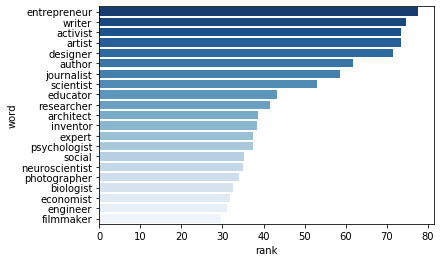

In [41]:
fig, ax = plt.subplots(ncols=1, nrows=1)
sns.barplot(data=df_vocab[:21], x='rank',y='word', ax=ax, palette = 'Blues_r');

https://www.datacamp.com/community/tutorials/wordcloud-python

In [42]:
word_dict = dict(zip(df_vocab['word'],df_vocab['rank']))

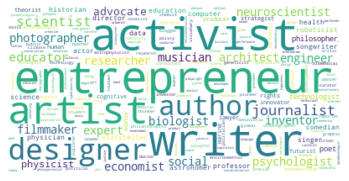

In [43]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_dict)

# Display the generated image:
# the argument interpolation="bilinear" in the plt.imshow(). This is to make the displayed image appear more smoothly. 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
wordcloud.to_file("speaker_occupation.png")

https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

In [45]:
n = 30
nmf = NMF(n_components=n,random_state=0)

occupation = nmf.fit_transform(vectors)
occ_cat = 1
occ_tag, tag_weight = {}, {}
for tid, t in enumerate(nmf.components_):
    occ_tag[tid] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-occ_cat - 1:-1]]
    tag_weight[tid] = t[t.argsort()[:-occ_cat - 1:-1]]

for key, val in occ_tag.items():
    print(key, ": ", val)

0 :  ['writer']
1 :  ['entrepreneur']
2 :  ['artist']
3 :  ['designer']
4 :  ['journalist']
5 :  ['activist']
6 :  ['author']
7 :  ['architect']
8 :  ['educator']
9 :  ['scientist']
10 :  ['psychologist']
11 :  ['neuroscientist']
12 :  ['inventor']
13 :  ['photographer']
14 :  ['economist']
15 :  ['filmmaker']
16 :  ['biologist']
17 :  ['researcher']
18 :  ['physicist']
19 :  ['musician']
20 :  ['engineer']
21 :  ['philosopher']
22 :  ['technologist']
23 :  ['expert']
24 :  ['social']
25 :  ['singer']
26 :  ['poet']
27 :  ['roboticist']
28 :  ['advocate']
29 :  ['historian']


In [46]:
# r = 5
# c = 2
# fig, ax = plt.subplots(figsize=(12,16),nrows=r, ncols=c)
# plt.subplots_adjust(wspace  =  1, hspace  =  0.5)
# plt.xticks(rotation=90)

# i=0
# for j in range(r):
    
#     for k in range(c):
#         sns.barplot(x=topic_word[i], y=word_weight[i], palette="Blues_r", ax=ax[j][k])
#         i += 1
#     if i > 9:
#         break
        
# plt.show()

In [47]:
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

# talk = ted_main_df[ted_main_df['url']==transcripts_df['url'].iloc[document_id]]
# print('\nTrue tags from ted_main.csv: \n',talk['tags'])

scrpt0 = pipeline.transform([df_spkr['occupation'].iloc[0]])

print("\n Topic Weight: ", scrpt0[0])
print("\n Relevant topic for the Transcript: ", np.argmax(scrpt0[0]))
print("\n Transcript: ", df_spkr['occupation'].iloc[0])


 Topic Weight:  [0.         0.00015812 0.         0.00098693 0.         0.02772436
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00218393
 0.         0.         0.         0.         0.         0.00283281
 0.         0.         0.         0.         0.09655657 0.        ]

 Relevant topic for the Transcript:  28

 Transcript:  Human rights attorney


In [48]:
topic = np.argmax(scrpt0)
print(topic)

28


In [49]:
df_spkr['proc_occupation'] = df_spkr['occupation'].apply(lambda x: occ_tag[np.argmax(pipeline.transform([x]))][0])
# df_scrpt['topic_tag'] =  df_scrpt['topic'].apply(lambda x: topic_word[x])
df_spkr.head()

,name,occupation,introduction,profile,proc_occupation
0,Gary Haugen,Human rights attorney,"As founder of International Justice Mission, G...",Why you should listen\n While a member of th...,advocate
1,Rabbi Lord Jonathan Sacks,Religious leader,"In a world violently polarized by extremists, ...",Why you should listen\nRabbi Lord Sacks is one...,expert
2,Joe Kowan,Musician and graphic designer,"By day he's a graphic designer, and by night J...",Why you should listen\nJoe Kowan is a Boston-b...,musician
3,Allan Adams,Theoretical physicist,Allan Adams is a theoretical physicist working...,Why you should listen\nAllan Adams is a theore...,physicist
4,Peter Tyack,Behavioral ecologist,Peter Tyack studies the social behavior and ac...,"Why you should listen\nPeter Tyack, a senior s...",economist


In [50]:
# df_spkr.head(20)

In [51]:
df_spkr['gender'] = df_spkr['name'].apply(lambda x: gd.get_gender(list(x.split())[0]))
df_spkr.head()

,name,occupation,introduction,profile,proc_occupation,gender
0,Gary Haugen,Human rights attorney,"As founder of International Justice Mission, G...",Why you should listen\n While a member of th...,advocate,male
1,Rabbi Lord Jonathan Sacks,Religious leader,"In a world violently polarized by extremists, ...",Why you should listen\nRabbi Lord Sacks is one...,expert,unknown
2,Joe Kowan,Musician and graphic designer,"By day he's a graphic designer, and by night J...",Why you should listen\nJoe Kowan is a Boston-b...,musician,male
3,Allan Adams,Theoretical physicist,Allan Adams is a theoretical physicist working...,Why you should listen\nAllan Adams is a theore...,physicist,male
4,Peter Tyack,Behavioral ecologist,Peter Tyack studies the social behavior and ac...,"Why you should listen\nPeter Tyack, a senior s...",economist,male


In [52]:
df_spkr['gender'].value_counts()

male             1327
female            727
unknown           330
mostly_male        85
mostly_female      62
andy               37
Name: gender, dtype: int64

In [53]:
df_spkr[df_spkr['gender'] == "mostly_male"]

,name,occupation,introduction,profile,proc_occupation,gender
21,Lee Smolin,Physicist,"Lee Smolin is a theoretical physicist, working...",Why you should listen\nLee Smolin's bachelor's...,physicist,mostly_male
60,Raj Panjabi,Physician,A billion people around the world lack access ...,Why you should listen\nRaj Panjabi was nine wh...,poet,mostly_male
96,Chris Bangle,Car designer,Car design is a ubiquitous but often overlooke...,Why you should listen\nAmerican designer Chris...,designer,mostly_male
105,Sam Kass,Food entrepreneur,Sam Kass's work connects nutrition and educati...,Why you should listen\nFood entrepreneur Sam K...,entrepreneur,mostly_male
127,Sydney Chaffee,Educator,Sydney Chaffee believes that teachers and stud...,Why you should listen\nAs the 2017 National Te...,educator,mostly_male
152,Dale Dougherty,Tech publisher,"A technology and publishing enthusiast, Dale D...",Why you should listen\nDale Dougherty co-found...,poet,mostly_male
155,Ray Zahab,Endurance runner,"In January 2009, Ray Zahab broke the record fo...",Why you should listen\nExtreme runner Ray Zaha...,journalist,mostly_male
177,Chris Nowinski,Social entrepreneur,Dr. Chris Nowinski is leading a global convers...,Why you should listen\nDr. Chris Nowinski is a...,social,mostly_male
197,Cameron Herold,Entrepreneur,"An entrepreneur since childhood, Cameron Herol...","Why you should listen\nFor 20 years, Cameron H...",entrepreneur,mostly_male
236,Morgan O'Neill,Disaster relief expert,Pursuing her PhD in atmospheric science did no...,Why you should listen\nMorgan O'Neill was in M...,expert,mostly_male


In [54]:
df_spkr[df_spkr['profile'].str.contains("he")]['profile'][0]

'Why you should listen\n   While a member of the 1994 United Nations team investigating war crimes in Rwanda, Gary Haugen’s eyes were opened to the appalling extent of violence in the developing world. Upon his return to the US, he founded International Justice Mission, an organization devoted to rescuing victims of global violence including trafficking and slavery.   In\xa0The Locust Effect, Haugen outlines the catastrophic effect of everyday violence on the lives of the impoverished, and shows how rampant violence is undermining efforts to alleviate poverty.\nWhat others say\n\n““Mr Haugen is right: violence in poor countries merits far more attention from donors in the rich world—even if only for reasons of self-interest.””\xa0—\xa0The Economist blog, March 12, 2014'

In [55]:
df_spkr['new_gender'] = df_spkr['profile'].apply(lambda x: "male" if ((" his " in x) or ("He " in x) or (" he " in x) 
                                                                      or ("His " in x)) else "female")
df_spkr.head()

,name,occupation,introduction,profile,proc_occupation,gender,new_gender
0,Gary Haugen,Human rights attorney,"As founder of International Justice Mission, G...",Why you should listen\n While a member of th...,advocate,male,male
1,Rabbi Lord Jonathan Sacks,Religious leader,"In a world violently polarized by extremists, ...",Why you should listen\nRabbi Lord Sacks is one...,expert,unknown,male
2,Joe Kowan,Musician and graphic designer,"By day he's a graphic designer, and by night J...",Why you should listen\nJoe Kowan is a Boston-b...,musician,male,male
3,Allan Adams,Theoretical physicist,Allan Adams is a theoretical physicist working...,Why you should listen\nAllan Adams is a theore...,physicist,male,male
4,Peter Tyack,Behavioral ecologist,Peter Tyack studies the social behavior and ac...,"Why you should listen\nPeter Tyack, a senior s...",economist,male,male


In [56]:
df_spkr['new_gender'].value_counts()

male      1553
female    1015
Name: new_gender, dtype: int64

In [57]:
final_df = df_spkr[['name', 'proc_occupation', 'new_gender']].copy()
final_df = final_df.rename(columns={'proc_occupation': 'occupation', 'new_gender' : 'gender'})
final_df.head()

,name,occupation,gender
0,Gary Haugen,advocate,male
1,Rabbi Lord Jonathan Sacks,expert,male
2,Joe Kowan,musician,male
3,Allan Adams,physicist,male
4,Peter Tyack,economist,male


In [58]:
final_df.to_csv("dataset/processed_speaker.csv", index=False)